In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
train_df = pd.read_csv('~/input/data/train/train_ratings.csv')

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5154471 entries, 0 to 5154470
Data columns (total 3 columns):
 #   Column  Dtype
---  ------  -----
 0   user    int64
 1   item    int64
 2   time    int64
dtypes: int64(3)
memory usage: 118.0 MB


In [5]:
num_train_users = train_df.user.nunique()
num_train_items = train_df.item.nunique()
print(f"number of users in train data : {num_train_users}")
print(f"number of items in train data : {num_train_items}")

number of users in train data : 31360
number of items in train data : 6807


In [6]:
print("Data sparsity ratio: ", 1 - len(train_df) / (num_train_users * num_train_items))

Data sparsity ratio:  0.9758536052697853


In [165]:
train_df.groupby('user')['item'].count().sort_values(ascending=False)

user
8405      2912
54465     1980
24219     1842
32514     1830
91349     1795
          ... 
11211       32
128756      28
105578      22
68606       19
53188       16
Name: item, Length: 31360, dtype: int64

<AxesSubplot: >

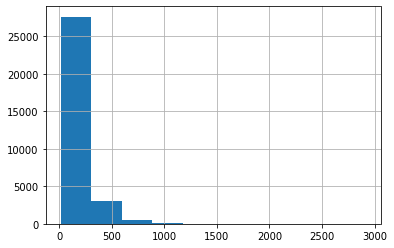

In [166]:
train_df.groupby('user')['item'].count().sort_values().hist()
# user별로 본 영화의 개수에 대한 편차가 큼 -> heavy/light user를 

In [7]:
years = pd.read_csv('~/input/data/train/years.tsv', sep = '\t')
directors = pd.read_csv('~/input/data/train/directors.tsv', sep = '\t')
genres = pd.read_csv('~/input/data/train/genres.tsv', sep = '\t')
titles = pd.read_csv('~/input/data/train/titles.tsv', sep = '\t')
writers = pd.read_csv('~/input/data/train/writers.tsv', sep = '\t')

## years

In [8]:
display(years.info(), years.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6799 entries, 0 to 6798
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   item    6799 non-null   int64
 1   year    6799 non-null   int64
dtypes: int64(2)
memory usage: 106.4 KB


None

,item,year
0,1348,1922
1,44587,1922
2,4768,1922
3,8235,1923
4,8609,1923


In [9]:
print(f"number of unique items : {years.item.nunique()}")
print(f"number of unique years : {years.year.nunique()}")

number of unique items : 6799
number of unique years : 93


<AxesSubplot: >

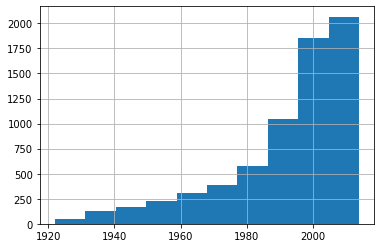

In [10]:
years.year.hist()

In [11]:
print(f"number of common unique items between 'train_df' and 'years' : {pd.merge(train_df, years, how = 'inner', on = 'item').item.nunique()}")

number of common unique items between 'train_df' and 'years' : 6799


## directors

In [12]:
display(directors.info(), directors.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5905 entries, 0 to 5904
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   item      5905 non-null   int64 
 1   director  5905 non-null   object
dtypes: int64(1), object(1)
memory usage: 92.4+ KB


None

,item,director
0,1237,nm0000005
1,5147,nm0000005
2,7327,nm0000005
3,2068,nm0000005
4,7396,nm0000005


In [13]:
print(f"number of unique items : {directors.item.nunique()}")
print(f"number of unique directors : {directors.director.nunique()}")

number of unique items : 5503
number of unique directors : 1340


In [14]:
directors.groupby('director').count().describe()

,item
count,1340.000000
mean,4.406716
std,3.633030
min,2.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,44.000000


In [15]:
print(f"number of common unique items between 'train_df' and 'directors' : {pd.merge(train_df, directors, how = 'inner', on = 'item').item.nunique()}")

number of common unique items between 'train_df' and 'directors' : 5503


In [141]:
# 동일한 Item에 대해서 여러명의 감독이 존재함
print(directors.groupby('item')['director'].nunique())
print("max number of directors in a single item :", max(directors.groupby('item')['director'].nunique()))

item
1         1
2         1
3         1
4         1
5         1
         ..
118696    1
118900    1
118997    1
119141    2
119145    1
Name: director, Length: 5503, dtype: int64
max number of directors in a single item : 14


## genres

In [16]:
display(genres.info(), genres.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15933 entries, 0 to 15932
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   item    15933 non-null  int64 
 1   genre   15933 non-null  object
dtypes: int64(1), object(1)
memory usage: 249.1+ KB


None

,item,genre
0,318,Crime
1,318,Drama
2,2571,Action
3,2571,Sci-Fi
4,2571,Thriller


In [17]:
print(f"number of unique items : {genres.item.nunique()}")
print(f"number of unique genres : {genres.genre.nunique()}")

number of unique items : 6807
number of unique genres : 18


In [18]:
print(f"unique genres : {genres.genre.unique()}")

unique genres : ['Crime' 'Drama' 'Action' 'Sci-Fi' 'Thriller' 'Comedy' 'Romance' 'War'
 'Adventure' 'Fantasy' 'Horror' 'Mystery' 'Animation' 'Children'
 'Film-Noir' 'Musical' 'Western' 'Documentary']


In [19]:
genres.groupby('genre').count().sort_values(by = 'item', ascending = False)

,item
genre,
Drama,3490
Comedy,2408
Thriller,1466
Romance,1251
Action,1246
Crime,924
Adventure,891
Sci-Fi,653
Horror,602


In [20]:
print(f"number of common unique items between 'train_df' and 'genres' : {pd.merge(train_df, genres, how = 'inner', on = 'item').item.nunique()}")

number of common unique items between 'train_df' and 'genres' : 6807


## titles

In [21]:
display(titles.info(), titles.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6807 entries, 0 to 6806
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   item    6807 non-null   int64 
 1   title   6807 non-null   object
dtypes: int64(1), object(1)
memory usage: 106.5+ KB


None

,item,title
0,318,"Shawshank Redemption, The (1994)"
1,2571,"Matrix, The (1999)"
2,2959,Fight Club (1999)
3,296,Pulp Fiction (1994)
4,356,Forrest Gump (1994)


In [22]:
print(f"number of unique items : {titles.item.nunique()}")
print(f"number of unique titles : {titles.title.nunique()}")

number of unique items : 6807
number of unique titles : 6806


In [23]:
# 중복 아이템 존재
titles[titles.title.duplicated(keep=False)]

,item,title
349,34048,War of the Worlds (2005)
1926,64997,War of the Worlds (2005)


In [24]:
print(f"number of common unique items between 'train_df' and 'titles' : {pd.merge(train_df, titles, how = 'inner', on = 'item').item.nunique()}")

number of common unique items between 'train_df' and 'titles' : 6807


## writers

In [25]:
display(writers.info(), writers.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11306 entries, 0 to 11305
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   item    11306 non-null  int64 
 1   writer  11306 non-null  object
dtypes: int64(1), object(1)
memory usage: 176.8+ KB


None

,item,writer
0,1237,nm0000005
1,5147,nm0000005
2,7327,nm0000005
3,2068,nm0000005
4,7396,nm0000005


In [26]:
print(f"number of unique items : {writers.item.nunique()}")
print(f"number of unique writers : {writers.writer.nunique()}")

number of unique items : 5648
number of unique writers : 2989


In [27]:
writers.groupby('writer').count().describe()

,item
count,2989.000000
mean,3.782536
std,2.993783
min,2.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,47.000000


In [140]:
# 동일한 Item에 대해서 여러명의 작가가 존재함
print(writers.groupby('item')['writer'].nunique())
print("max number of writers in a single item :", max(writers.groupby('item')['writer'].nunique()))

item
1         7
2         3
3         1
4         1
5         4
         ..
118696    5
118900    1
118997    1
119141    2
119145    4
Name: writer, Length: 5648, dtype: int64
max number of writers in a single item : 24


In [28]:
print(f"number of common unique items between 'train_df' and 'writers' : {pd.merge(train_df, writers, how = 'inner', on = 'item').item.nunique()}")

number of common unique items between 'train_df' and 'writers' : 5648


# Merge

In [29]:
from functools import reduce

In [30]:
dfs = [train_df, years, writers, titles, genres, directors]

In [31]:
merge_df = reduce(lambda left, right : pd.merge(left, right, how = 'left', on = 'item'), dfs)

In [32]:
display(merge_df.info(), merge_df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48264331 entries, 0 to 48264330
Data columns (total 8 columns):
 #   Column    Dtype  
---  ------    -----  
 0   user      int64  
 1   item      int64  
 2   time      int64  
 3   year      float64
 4   writer    object 
 5   title     object 
 6   genre     object 
 7   director  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 3.2+ GB


None

,user,item,time,year,writer,title,genre,director
0,11,4643,1230782529,2001.0,nm0099541,Planet of the Apes (2001),Action,nm0000318
1,11,4643,1230782529,2001.0,nm0099541,Planet of the Apes (2001),Adventure,nm0000318
2,11,4643,1230782529,2001.0,nm0099541,Planet of the Apes (2001),Drama,nm0000318
3,11,4643,1230782529,2001.0,nm0099541,Planet of the Apes (2001),Sci-Fi,nm0000318
4,11,4643,1230782529,2001.0,nm0115310,Planet of the Apes (2001),Action,nm0000318


In [33]:
merge_df.item.nunique()

6807

In [36]:
merge_df.groupby('item')['genre'].unique()

item
1         [Adventure, Animation, Children, Comedy, Fantasy]
2                            [Adventure, Children, Fantasy]
3                                         [Comedy, Romance]
4                                  [Comedy, Drama, Romance]
5                                                  [Comedy]
                                ...                        
118700                                              [Drama]
118900                                              [Drama]
118997                 [Children, Comedy, Fantasy, Musical]
119141                                     [Action, Comedy]
119145                   [Action, Adventure, Comedy, Crime]
Name: genre, Length: 6807, dtype: object

# item2attributes 생성

In [362]:
dfs_tmp = [years, directors, genres, writers]
merge_tmp = reduce(lambda left,right: pd.merge(left, right, how = 'outer', on = 'item'), dfs_tmp)

In [363]:
merge_tmp

,item,year,director,genre,writer
0,1348,1922.0,nm0003638,Horror,nm0831290
1,44587,1922.0,NaN,Documentary,NaN
2,44587,1922.0,NaN,Drama,NaN
3,4768,1922.0,nm0000485,Crime,nm0000485
4,4768,1922.0,nm0000485,Crime,nm0415167
...,...,...,...,...,...
37669,32898,NaN,NaN,Adventure,nm0920229
37670,32898,NaN,NaN,Fantasy,nm0894523
37671,32898,NaN,NaN,Fantasy,nm0920229
37672,32898,NaN,NaN,Sci-Fi,nm0894523


In [364]:
for col in merge_tmp.columns : 
        if col != 'item' : 
                array, index = pd.factorize(merge_tmp[col])
                merge_tmp[col] = array
    
merge_gb = merge_tmp.groupby('item')

In [365]:
merge_tmp

,item,year,director,genre,writer
0,1348,0,0,0,0
1,44587,0,-1,1,-1
2,44587,0,-1,2,-1
3,4768,0,1,3,1
4,4768,0,1,3,2
...,...,...,...,...,...
37669,32898,-1,-1,10,83
37670,32898,-1,-1,9,443
37671,32898,-1,-1,9,83
37672,32898,-1,-1,12,443


In [367]:
merge_tmp.groupby('item')['genre'].apply(lambda x:list(set(x))) + merge_tmp.groupby('item')['year'].apply(lambda x:list(set(x)))

item
1         [7, 9, 10, 13, 14, 73]
2                [9, 10, 14, 73]
3                     [8, 7, 73]
4                  [8, 2, 7, 73]
5                        [7, 73]
                   ...          
118700                   [2, 92]
118900                   [2, 92]
118997        [9, 15, 14, 7, 92]
119141                [6, 7, 92]
119145         [10, 3, 6, 7, -1]
Length: 6807, dtype: object

In [368]:
lst=[]
for feat in ['year','director','genre','writer'] : 
    lst.append(merge_tmp.groupby('item')[feat].apply(lambda x:list(set(x))))

In [369]:
merge_attr = reduce(lambda left, right : left+right, lst)

In [373]:
merge_attr.columns = ['attributes']

In [378]:
merge_attr.name = 'attributes'

In [395]:
merge = pd.merge(left=merge_tmp, right=merge_attr, on='item', how='inner')

In [ ]:
merge.groupby('item')['attributes'].apply(lambda x:list(x)[0]).to_json()